# _Trial 1: Fake News_

Build a system to identify unreliable news articles. Data acquired via [Kaggle](https://www.kaggle.com/c/fake-news/data).

In [1]:
# !pip install kaggle

In [13]:
# import libraries
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import random
import os

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [14]:
os.getcwd()

'/Users/jai/Documents/projects/fake-news'

In [15]:
os.listdir()

['trial1.ipynb', '.ipynb_checkpoints', 'data']

In [16]:
#create environment variables for kaggle to authenticate with
#os.environ['KAGGLE_USERNAME'] = "insert-here"
#os.environ['KAGGLE_KEY'] = "insert-here"

In [17]:
#!kaggle competitions download -c fake-news -p 'data'

In [18]:
from pathlib import Path

#create path variable to primary directory
path = Path(os.getcwd())
path

PosixPath('/Users/jai/Documents/projects/fake-news')

In [19]:
# make a dataframe from train.csv
train_df = pd.read_csv(path/'data/train.csv')

# make a dataframe from test.csv
test_df = pd.read_csv(path/'data/test.csv')

In [20]:
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### _Data Description on `train_df`_

train.csv: A full training dataset with the following attributes:

- `id`: unique id for a news article
- `title`: the title of a news article
- `author`: author of the news article
- `text`: the text of the article; could be incomplete
- `label`: a label that marks the article as potentially unreliable
    - `1`: unreliable
    - `0`: reliable

In [21]:
test_df.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
id        5200 non-null int64
title     5078 non-null object
author    4697 non-null object
text      5193 non-null object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


### _EDA_

In [28]:
# generate random floating point values
from random import seed
from random import random, randint
# seed random number generator
seed(1)

random_articles = []

# generate some integers
for _ in range(0, 5):
	value = randint(0, len(train_df))
	random_articles.append(value)

In [29]:
for i in random_articles:
    print(train_df['title'][i])
    print(train_df['author'][i])
    print(train_df['text'][i])
    print(train_df['label'][i])
    print('')

Canada’s Immigration Website Crashed As Terrified Hillary Supporters Freaked Out On Election Night
Mac Slavo

Scores of celebrities openly claimed that they would leave America and head for greener pastures elsewhere should Trump be elected. Last night, they weren’t alone. As results were tallied across the United States and a Donald Trump Presidency became imminent, Canadian officials report that their immigration website received so much traffic it took down the system.
There is only one thing that could possibly be worse than a Donald Trump Presidency: realizing that your safe-space exit plan was the same plan tens of thousands of other people had and now you can’t get to the web site to start the process.
It must have been terrifying to see this:
(Screenshot courtesy Hackread) 
HackRead reports :
Canada’s main immigration website appeared to suffer repeated outages on Tuesday night as Trump took the lead in several major states and his prospects for winning the U.S. presidency turn

In [38]:
# drop missing observations from text column
train_df = train_df[~train_df['text'].isnull()]
test_df = test_df[~test_df['text'].isnull()]

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20761 entries, 0 to 20799
Data columns (total 5 columns):
id        20761 non-null int64
title     20203 non-null object
author    18843 non-null object
text      20761 non-null object
label     20761 non-null int64
dtypes: int64(2), object(3)
memory usage: 973.2+ KB


In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5193 entries, 0 to 5199
Data columns (total 4 columns):
id        5193 non-null int64
title     5071 non-null object
author    4697 non-null object
text      5193 non-null object
dtypes: int64(1), object(3)
memory usage: 202.9+ KB


In [41]:
# reset index to id
train_df.set_index('id', inplace=True)
test_df.set_index('id', inplace=True)

In [42]:
train_df.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [43]:
test_df.head()

,title,author,text
id,,,
20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [49]:
!pip install textblob

     |████████████████████████████████| 645kB 1.6MB/s eta 0:00:01


In [51]:
from textblob import TextBlob

train_df['polarity'] = train_df['text'].map(lambda text: TextBlob(text).sentiment.polarity)

In [52]:
# get word count for each article
train_df['word_count'] = train_df['text'].apply(lambda x: len(str(x).split()))

In [53]:
train_df.head()

,title,author,text,label,polarity,word_count
id,,,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,0.006777,820
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,0.100880,710
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,0.056258,1266
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,0.017497,557
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,-0.012500,154


In [63]:
pos_examples = train_df.loc[train_df.polarity >= 0.75, 'text'].sample(5).values

for example in pos_examples:
    print(example)

LOL, gotta use the fireplace log holder as a stand. Shows the attention to detail.
Hold on let me get my daughters slingshot and see if can withstand that.
Hillary Dillary Dock...
This Rat ran out the Clock
The Fix is in, but she still won't win... 
Assange has depleted her Stock.
I love it when libtards get their a** handed to them on a platter. Great job, O Reilly!
jewsnews © 2015 | JEWSNEWS | It's not news...unless it's JEWS NEWS !!! Proudly powered by WordPress — Theme: JustWrite by Acosmin Join the over 1.4 million fans of Jews News on FB…It’s NOT news unless it’s Jews News!
Great article !


In [64]:
neg_examples = train_df.loc[train_df.polarity <= -0.75, 'text'].sample(5).values

for example in neg_examples:
    print(example)

film , deutschland und russland Der neue Film des Regisseurs Alexei Misgirew zeigt Russland im 19. Jahrhundert. Sankt Petersburg sprach damals schon Deutsch. Quelle:Kinopoisk.ru 
Alexei Misgirews Film „Duellant“ (The Duelist) stieß schon während der Produktion auf große Resonanz in der internationalen Filmindustrie. Seine Weltpremiere feierte der Streifen schließlich auf dem Toronto Film Festival. Eine Kooperation mit IMAX ermöglicht nun seinen Verleih in den USA und einigen anderen Ländern. Bis zu diesem Erfolg hatte Misgirew in Russland den Ruf eines „Regisseurs der zweiten Reihe“. Seine Filme kamen alle nur in den begrenzten Verleih, wo sie ein Publikum von wenigen Tausend Zuschauern erreichten. Jetzt realisierte Misgirew zusammen mit dem Produzenten Alexander Rodnianski („Jayne Mansfield’s Car“, „Cloud Atlas“, „Leviathan“) eines der größten Projekte der Geschichte des neueren russischen Kinos. 
„The Duelist“ ist ein in den 1860er-Jahren spielendes Kostümdrama über einen Auftragsmör

### _Basic Modeling_

In [81]:
# set y
y = train_df['label']

# set x 
X = train_df['text']

# make training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [82]:
# build vectorizers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# initialize count vectorizer, removing English stop words and words that appear in > 70% of the articles
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.7) 

# fit and transform the training data
count_train = count_vectorizer.fit_transform(X_train)

# transform test set
count_test = count_vectorizer.transform(X_test)

In [83]:
# initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# fit and transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# transform the test set
tfidf_test = tfidf_vectorizer.transform(X_test)

In [84]:
print(tfidf_vectorizer.get_feature_names()[-10:])
print(count_vectorizer.get_feature_names()[-10:])

['ᴇᴀsᴛᴇʀsᴜɴᴅᴀʏ', 'ḥaram', '不動心', '中文', '初心', '残心', '点击查看本文中文版', '無心', 'ﬁnds', 'ｓꮭ']
['ᴇᴀsᴛᴇʀsᴜɴᴅᴀʏ', 'ḥaram', '不動心', '中文', '初心', '残心', '点击查看本文中文版', '無心', 'ﬁnds', 'ｓꮭ']


In [85]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [90]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# define classifier
clf = MultinomialNB()

# fit model
clf.fit(tfidf_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Accuracy: 0.8628993417884091
Confusion matrix, without normalization


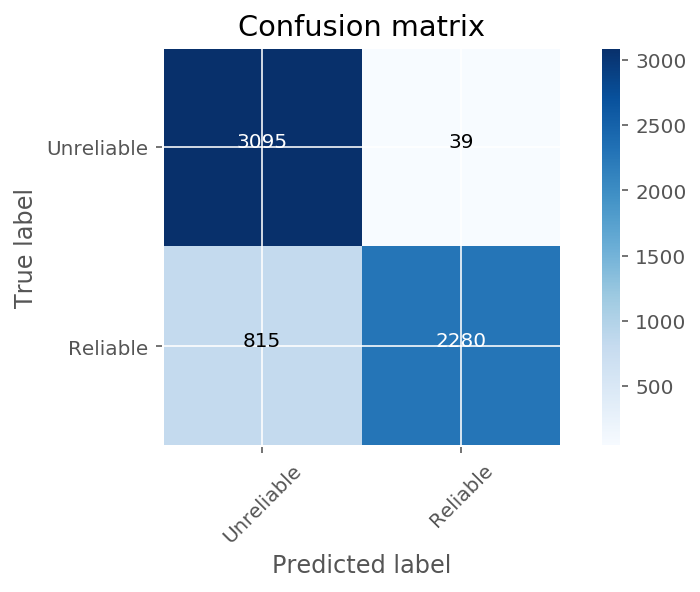

In [93]:
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("Accuracy: {}".format(score))
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Unreliable', 'Reliable'])

In [94]:
# count vectorizer
# create new clf
clf = MultinomialNB()

# fit model
clf.fit(count_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Accuracy: 0.8991812489966287
Confusion matrix, without normalization


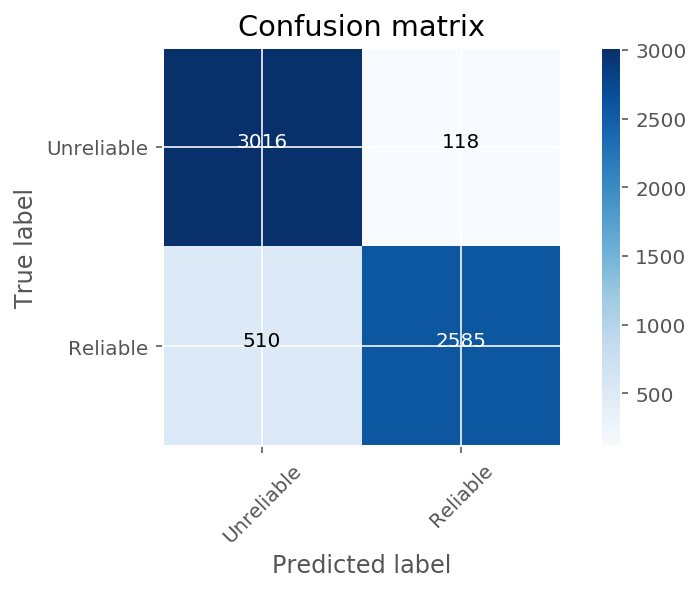

In [95]:
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("Accuracy: {}".format(score))
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Unreliable', 'Reliable'])